NaN values in features: 0
NaN values in target: 0
Linear Regression MSE (Train): 0.0022
Linear Regression MSE (Test): 0.0026


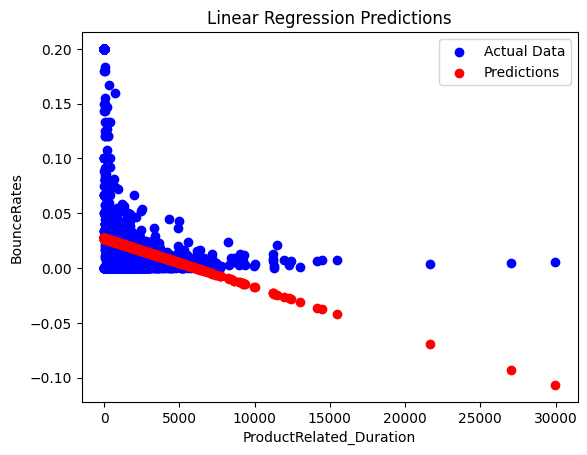

Polynomial Regression MSE (Train): 0.0021
Polynomial Regression MSE (Test): 0.0026


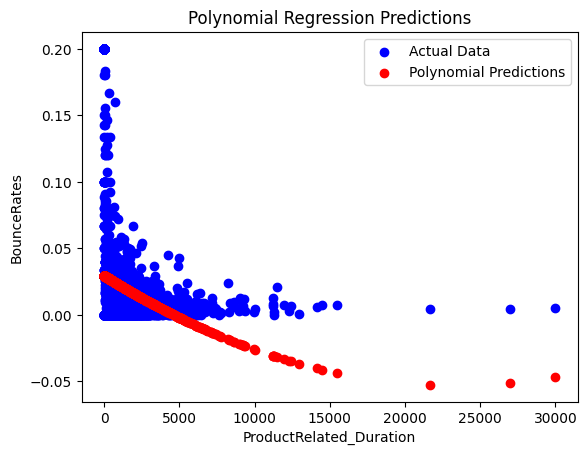

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('online_shoppers_intention.csv')  # Adjust the path accordingly

# Ensure no NaN values are present
print("NaN values in features:", np.isnan(data['ProductRelated_Duration']).sum())
print("NaN values in target:", np.isnan(data['BounceRates']).sum())

# Remove NaN values if present
data = data.dropna(subset=['ProductRelated_Duration', 'BounceRates'])

# Assign features and target variable
X = data[['ProductRelated_Duration']].values
y = data['BounceRates'].values

# Split the data into training and test sets    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Evaluate the Linear Regression Model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Linear Regression MSE (Train): {mse_train:.4f}")
print(f"Linear Regression MSE (Test): {mse_test:.4f}")

# Plot Linear Regression Predictions
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_test_pred, color='red', label='Predictions')
plt.title('Linear Regression Predictions')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('BounceRates')
plt.legend()
plt.show()

# Polynomial Regression
degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Fit the Polynomial Regression Model
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly_train, y_train)

# Make predictions
y_poly_train_pred = lin_reg_poly.predict(X_poly_train)
y_poly_test_pred = lin_reg_poly.predict(X_poly_test)

# Evaluate the Polynomial Regression Model
mse_poly_train = mean_squared_error(y_train, y_poly_train_pred)
mse_poly_test = mean_squared_error(y_test, y_poly_test_pred)
print(f"Polynomial Regression MSE (Train): {mse_poly_train:.4f}")
print(f"Polynomial Regression MSE (Test): {mse_poly_test:.4f}")

# Plot Polynomial Regression Predictions
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_poly_test_pred, color='red', label='Polynomial Predictions')
plt.title('Polynomial Regression Predictions')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('BounceRates')
plt.legend()
plt.show()


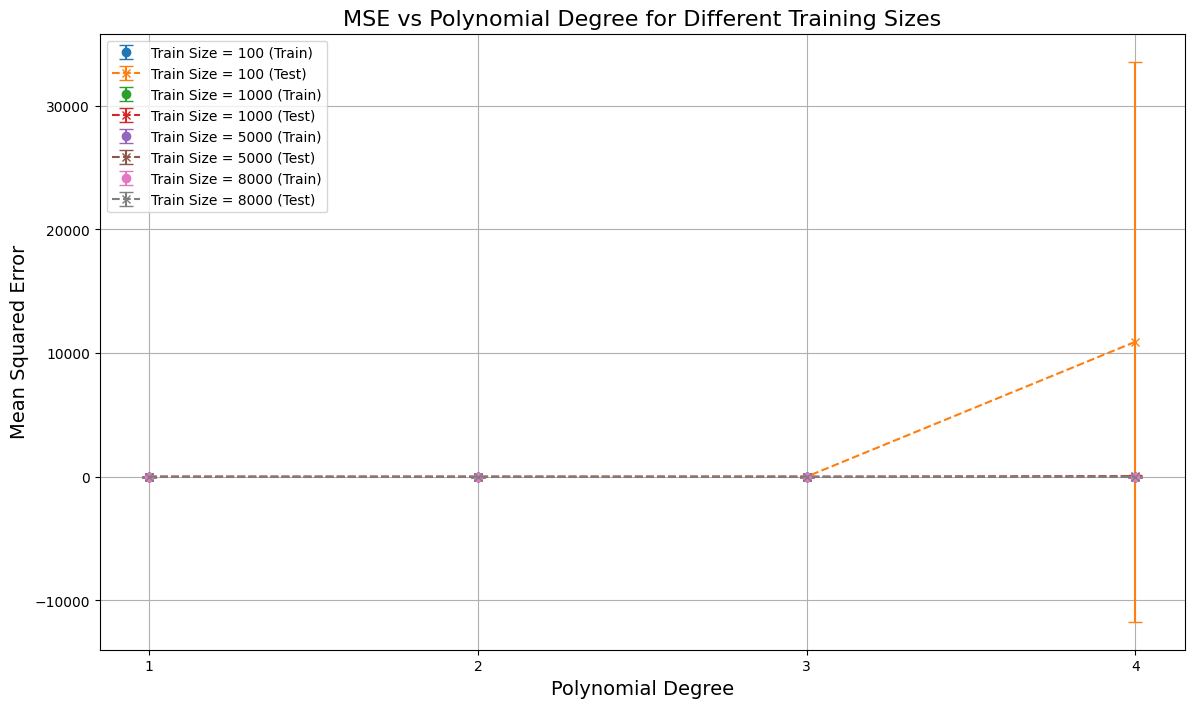

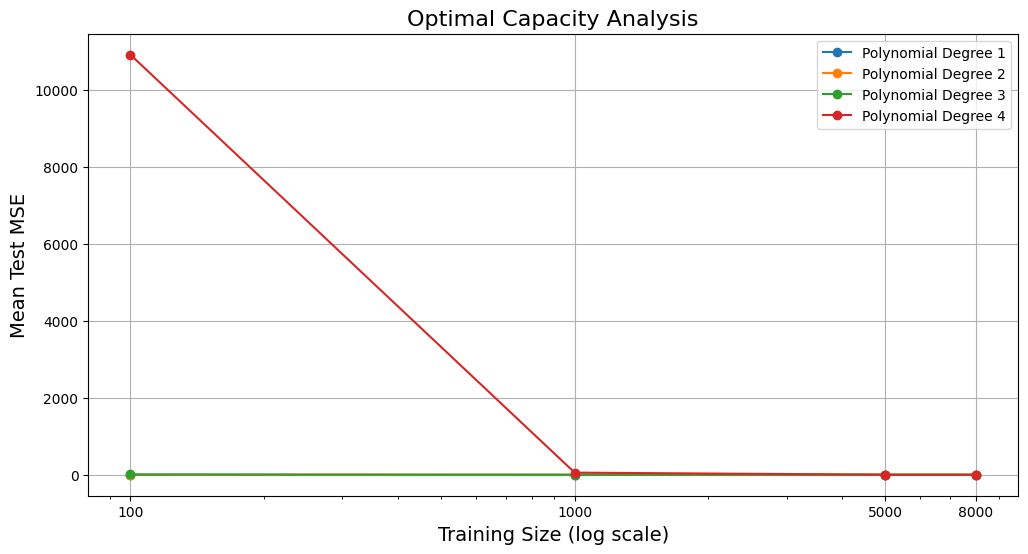

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
data = pd.read_csv('online_shoppers_intention.csv')  # Adjust the path accordingly

# Remove NaN values if present
data = data.dropna(subset=['ProductRelated_Duration', 'BounceRates'])

# Assign features and target variable
X = data[['ProductRelated_Duration']].values
y = data['BounceRates'].values

# Generate random training sets of specified sizes
sizes = [100, 1000, 5000, 8000]
degrees = [1, 2, 3, 4]
results = {size: {degree: {'mse_train': [], 'mse_test': []} for degree in degrees} for size in sizes}

# Create a function to evaluate the models
def evaluate_models(X_train, y_train, X_test, y_test):
    mse_results = {}
    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_poly_train = poly_features.fit_transform(X_train)
        X_poly_test = poly_features.transform(X_test)

        # Fit model
        model = LinearRegression()
        model.fit(X_poly_train, y_train)

        # Predictions
        y_train_pred = model.predict(X_poly_train)
        y_test_pred = model.predict(X_poly_test)

        # Calculate MSE
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)

        mse_results[degree] = {
            'mse_train': mse_train,
            'mse_test': mse_test
        }
    
    return mse_results

# Loop through each training size
for size in sizes:
    for _ in range(40):  # Generate 40 random samples for each size
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, random_state=np.random.randint(1, 1000))
        mse_results = evaluate_models(X_train, y_train, X_test, y_test)

        # Store the results
        for degree in degrees:
            results[size][degree]['mse_train'].append(mse_results[degree]['mse_train'])
            results[size][degree]['mse_test'].append(mse_results[degree]['mse_test'])

# Prepare data for plotting
mean_mse_train = {size: {degree: np.mean(results[size][degree]['mse_train']) for degree in degrees} for size in sizes}
std_mse_train = {size: {degree: np.std(results[size][degree]['mse_train']) for degree in degrees} for size in sizes}
mean_mse_test = {size: {degree: np.mean(results[size][degree]['mse_test']) for degree in degrees} for size in sizes}
std_mse_test = {size: {degree: np.std(results[size][degree]['mse_test']) for degree in degrees} for size in sizes}

# MSE vs Polynomial Degree for different training sizes
plt.figure(figsize=(14, 8))
for size in sizes:
    plt.errorbar(degrees, [mean_mse_train[size][deg] for deg in degrees],
                 yerr=[std_mse_train[size][deg] for deg in degrees],
                 label=f'Train Size = {size} (Train)', fmt='o', capsize=5)
    
    plt.errorbar(degrees, [mean_mse_test[size][deg] for deg in degrees],
                 yerr=[std_mse_test[size][deg] for deg in degrees],
                 label=f'Train Size = {size} (Test)', fmt='x', linestyle='--', capsize=5)

plt.xlabel('Polynomial Degree', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('MSE vs Polynomial Degree for Different Training Sizes', fontsize=16)
plt.xticks(degrees)
plt.legend()
plt.grid()
plt.show()

# Optimal Capacity Analysis
optimal_capacity = {degree: [] for degree in degrees}
for degree in degrees:
    for size in sizes:
        optimal_capacity[degree].append(np.mean([results[size][degree]['mse_test'][i] for i in range(40)]))

# Plotting Optimal Capacity
plt.figure(figsize=(12, 6))
for degree in degrees:
    plt.plot(sizes, optimal_capacity[degree], marker='o', label=f'Polynomial Degree {degree}')

plt.xscale('log')
plt.xlabel('Training Size (log scale)', fontsize=14)
plt.ylabel('Mean Test MSE', fontsize=14)
plt.title('Optimal Capacity Analysis', fontsize=16)
plt.xticks(sizes, sizes)
plt.legend()
plt.grid()
plt.show()
